In [43]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("speed-dating-experiment/Speed Dating Data.csv", encoding="ISO-8859-1")

df.head(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [44]:
df.shape

(8378, 195)

# Cleaning

In [45]:
to_remove = []

In [46]:
for a in df.columns:
    if df[a].isna().sum() > 4000:
        to_remove.append(a)

In [47]:
df = df.drop(to_remove, axis=1)

In [48]:
df.shape

(8378, 130)

In [49]:
df2 = df.copy()

## Only filter out people who got to the second date

In [50]:
df2['match'].shape

(8378,)

In [51]:
pd.crosstab(index=df2["match"], columns="count")

col_0,count
match,
0,6998
1,1380


In [56]:
(1380/6998 ) * 100

19.719919977136325

In [53]:
matched = df2[df2["match"] == 1]
matched.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
2,1,1.0,0,1,1,1,10,7,NaN,10,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
8,1,1.0,0,1,1,1,10,7,NaN,8,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
13,2,2.0,0,3,1,1,10,3,NaN,1,...,NaN,NaN,NaN,NaN,NaN,7.0,6.0,8.0,9.0,4.0


In [54]:
matched.shape

(1380, 130)

## Attributes

### Race 

In [55]:
pd.crosstab(index=matched["samerace"], columns="count")

col_0,count
samerace,
0,814
1,566


### Age

In [30]:
age = pd.crosstab(index=matched["age_o"], columns="count").reset_index()
age.head(3)

col_0,age_o,count
0,19.0,5
1,20.0,14
2,21.0,65


''

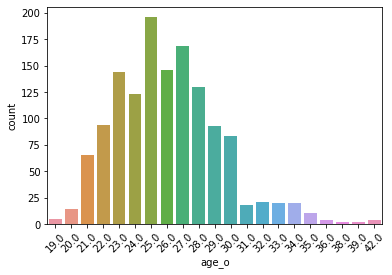

In [31]:
sns.barplot(x=age["age_o"], y=age["count"]).set_xticklabels(
    rotation=45, labels=age["age_o"]
)
;

### Job

In [32]:
cols = [
    "Law  ",
    "Math",
    "Social Science, Psychologist ",
    "Medical Science, Pharmaceuticals, and Bio Tech ",
    "Engineering  ",
    "English/Creative Writing/ Journalism ",
    "History/Religion/Philosophy ",
    "Business/Econ/Finance ",
    "Education, Academia ",
    "Biological Sciences/Chemistry/Physics",
    "Social Work ",
    "Undergrad/undecided ",
    "Political Science/International Affairs ",
    "Film",
    "Fine Arts/Arts Administration",
    "Languages",
    "Architecture",
    "Other",
]

In [33]:
fields = pd.crosstab(index=matched["field_cd"], columns="count").reset_index()
fields

col_0,field_cd,count
0,1.0,136
1,2.0,21
2,3.0,128
3,4.0,46
4,5.0,117
5,6.0,48
6,7.0,40
7,8.0,338
8,9.0,95
9,10.0,161


''

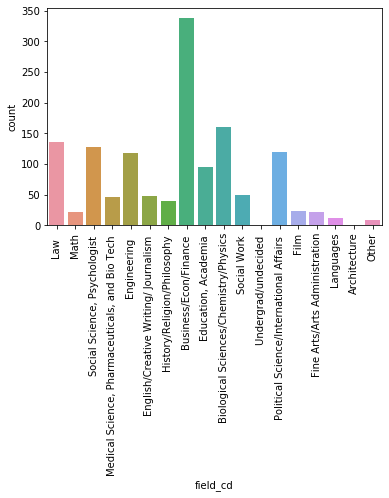

In [34]:
sns.barplot(x=fields["field_cd"], y=fields["count"]).set_xticklabels(
    rotation=90, labels=cols
)
;

### Goal

In [35]:
cols2 = [
    "Seemed like a fun night out",
    "To meet new people",
    "To get a date",
    "Looking for a serious relationship",
    "To say I did it",
    "Other",
]

In [36]:
goal = pd.crosstab(index=matched["goal"], columns="count").reset_index()
goal

col_0,goal,count
0,1.0,583
1,2.0,484
2,3.0,100
3,4.0,51
4,5.0,85
5,6.0,62


''

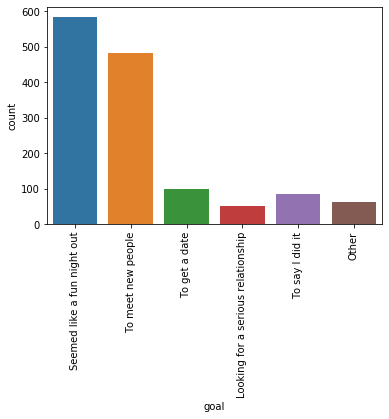

In [38]:
sns.barplot(x=goal["goal"], y=goal["count"]).set_xticklabels(
    rotation=90, labels=cols2
)
;

In [39]:
for a in enumerate(matched.columns):
    print(a)

(0, 'iid')
(1, 'id')
(2, 'gender')
(3, 'idg')
(4, 'condtn')
(5, 'wave')
(6, 'round')
(7, 'position')
(8, 'positin1')
(9, 'order')
(10, 'partner')
(11, 'pid')
(12, 'match')
(13, 'int_corr')
(14, 'samerace')
(15, 'age_o')
(16, 'race_o')
(17, 'pf_o_att')
(18, 'pf_o_sin')
(19, 'pf_o_int')
(20, 'pf_o_fun')
(21, 'pf_o_amb')
(22, 'pf_o_sha')
(23, 'dec_o')
(24, 'attr_o')
(25, 'sinc_o')
(26, 'intel_o')
(27, 'fun_o')
(28, 'amb_o')
(29, 'shar_o')
(30, 'like_o')
(31, 'prob_o')
(32, 'met_o')
(33, 'age')
(34, 'field')
(35, 'field_cd')
(36, 'undergra')
(37, 'race')
(38, 'imprace')
(39, 'imprelig')
(40, 'from')
(41, 'zipcode')
(42, 'goal')
(43, 'date')
(44, 'go_out')
(45, 'career')
(46, 'career_c')
(47, 'sports')
(48, 'tvsports')
(49, 'exercise')
(50, 'dining')
(51, 'museums')
(52, 'art')
(53, 'hiking')
(54, 'gaming')
(55, 'clubbing')
(56, 'reading')
(57, 'tv')
(58, 'theater')
(59, 'movies')
(60, 'concerts')
(61, 'music')
(62, 'shopping')
(63, 'yoga')
(64, 'exphappy')
(65, 'attr1_1')
(66, 'sinc1_1')
(

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,gender
3422,1.0,3.0,3.0,10.0,9.0,10.0,2.0,1.0,7.0,7.0,1.0,9.0,9.0,6.0,10.0,10.0,0
3445,8.0,5.0,8.0,8.0,10.0,10.0,8.0,2.0,8.0,7.0,5.0,9.0,9.0,10.0,10.0,7.0,0
3451,8.0,5.0,8.0,8.0,10.0,10.0,8.0,2.0,8.0,7.0,5.0,9.0,9.0,10.0,10.0,7.0,0
3469,10.0,10.0,9.0,10.0,10.0,8.0,9.0,14.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0
3476,8.0,1.0,5.0,7.0,7.0,7.0,4.0,1.0,3.0,4.0,1.0,3.0,4.0,6.0,7.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,8.0,5.0,6.0,9.0,7.0,7.0,4.0,8.0,8.0,7.0,7.0,8.0,8.0,10.0,10.0,8.0,1
8305,8.0,5.0,6.0,9.0,7.0,7.0,4.0,8.0,8.0,7.0,7.0,8.0,8.0,10.0,10.0,8.0,1
8341,6.0,1.0,7.0,6.0,7.0,3.0,2.0,1.0,7.0,10.0,2.0,5.0,6.0,7.0,7.0,7.0,1
8346,6.0,1.0,7.0,6.0,7.0,3.0,2.0,1.0,7.0,10.0,2.0,5.0,6.0,7.0,7.0,7.0,1


In [40]:
df_interests = pd.concat([matched.iloc[:, 47:63], matched["gender"]], axis=1)
df_interests.head(10)

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,gender
2,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,0
3,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,0
4,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,0
8,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,0
13,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,0
18,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,0
33,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,0
38,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,0
43,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,0
48,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,0


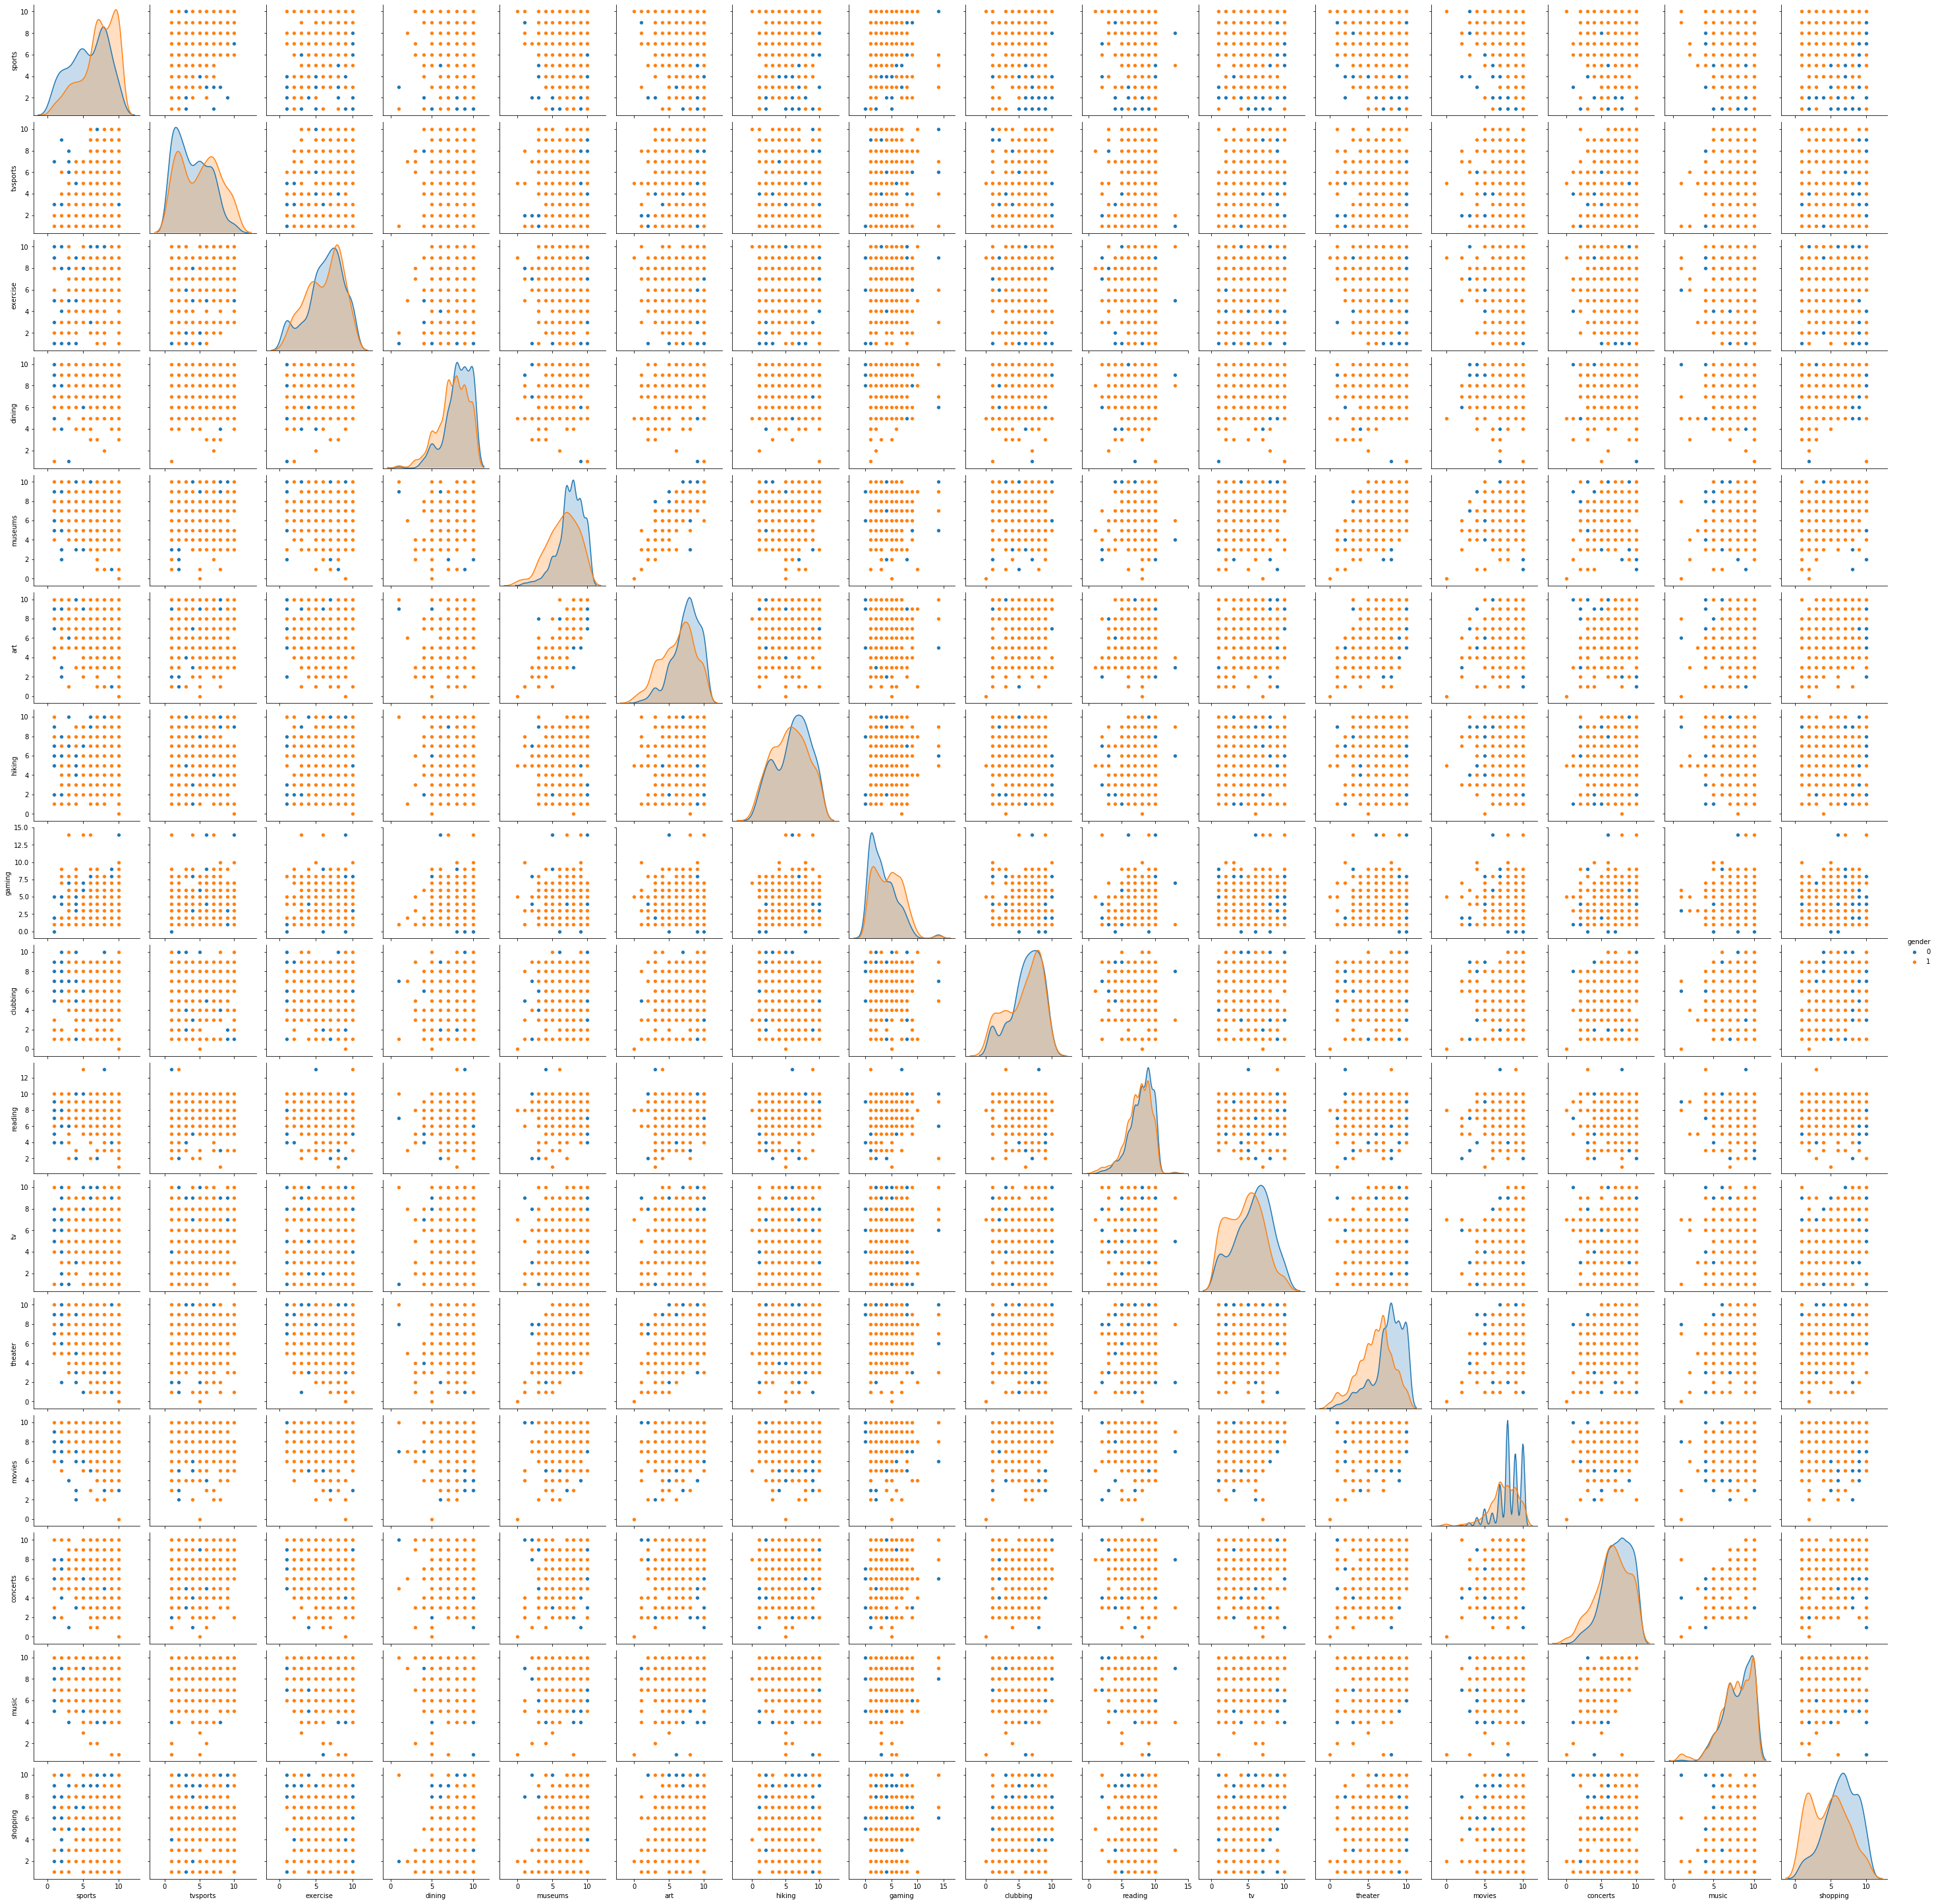

In [41]:
sns.pairplot(df_interests, hue="gender")

-> dining, hiking, clubbing, reading, music

attr5_1 
Attractive
sinc5_1
Sincere
int5_1
Intelligent
fun5_1
Fun
amb5_1
Ambitious

In [250]:
def ret_cross_attr(atrr2):
    temp = pd.crosstab(index=matched[atrr2], columns="count").reset_index()
    return sns.barplot(x=temp[atrr2], y=temp["count"])

### Go out

	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7

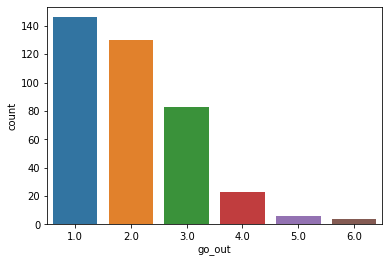

In [251]:
ret_cross_attr("go_out")

### How they felt about themselves -> Attractiveness

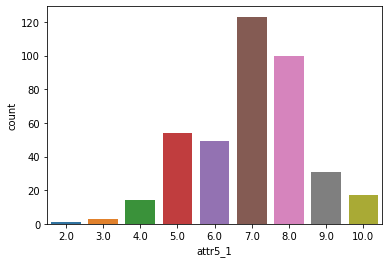

In [189]:
ret_cross_attr("attr5_1")

### How they felt about themselves -> Fun

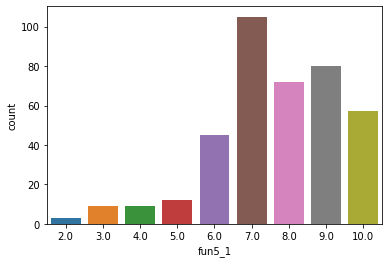

In [190]:
ret_cross_attr("fun5_1")

### How they felt about themselves -> Ambitious

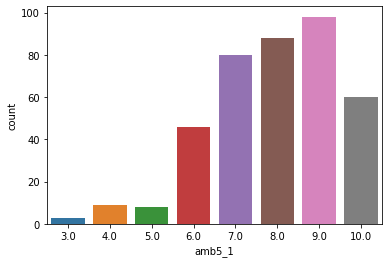

In [191]:
ret_cross_attr("amb5_1")

### How happy do you expect it will make you?

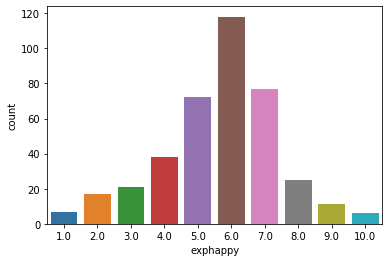

In [195]:
ret_cross_attr("exphappy")

### Compare with personal confidence


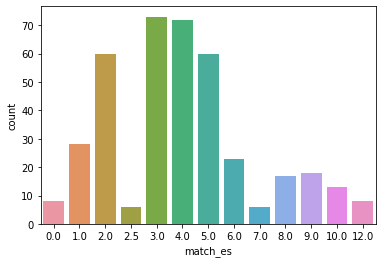

In [202]:
ret_cross_attr("match_es")

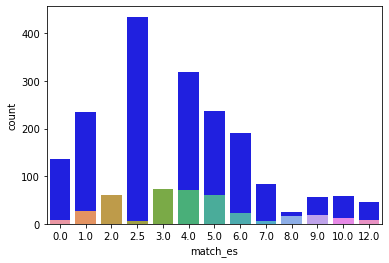

In [214]:
temp = pd.crosstab(
    index=df2[df2["match"] == 0]["match_es"], columns="count"
).reset_index()
sns.barplot(x=temp["match_es"], y=temp["count"], color="b")
ret_cross_attr("match_es")

### Rating

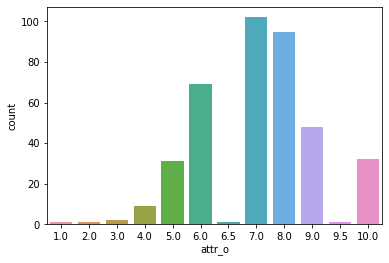

In [219]:
ret_cross_attr("attr_o")

## Features of the ones who got a 10

In [222]:
ten = matched[matched["attr_o"] == 10]
ten.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
3541,248,6.0,1,12,1,10,9,9,9.0,4,...,10.00,20.00,20.00,20.00,10.00,5.0,6.0,8.0,7.0,8.0
3706,258,7.0,0,13,2,11,21,5,5.0,7,...,2.00,12.00,18.00,5.00,23.00,7.0,10.0,9.0,8.0,4.0
3747,260,9.0,0,17,2,11,21,8,8.0,11,...,17.00,19.00,15.00,15.00,15.00,7.0,8.0,8.0,7.0,7.0
3922,268,17.0,0,33,2,11,21,9,9.0,20,...,9.52,14.29,19.05,4.76,14.29,8.0,8.0,8.0,7.0,8.0
4421,292,20.0,1,40,2,11,21,14,14.0,15,...,20.00,20.00,20.00,10.00,15.00,10.0,10.0,9.0,8.0,10.0


In [224]:
ten.shape

(32, 130)

### Race 

In [223]:
pd.crosstab(index=ten["samerace"], columns="count")

col_0,count
samerace,
0,19
1,13


### Age

In [225]:
age = pd.crosstab(index=ten["age_o"], columns="count").reset_index()
age.head(3)

col_0,age_o,count
0,22.0,2
1,23.0,5
2,24.0,1


''

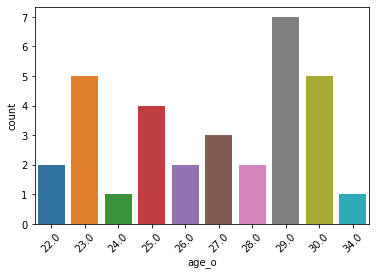

In [226]:
sns.barplot(x=age["age_o"], y=age["count"]).set_xticklabels(
    rotation=45, labels=age["age_o"]
)
;

### Job

In [227]:
cols = [
    "Law  ",
    "Math",
    "Social Science, Psychologist ",
    "Medical Science, Pharmaceuticals, and Bio Tech ",
    "Engineering  ",
    "English/Creative Writing/ Journalism ",
    "History/Religion/Philosophy ",
    "Business/Econ/Finance ",
    "Education, Academia ",
    "Biological Sciences/Chemistry/Physics",
    "Social Work ",
    "Undergrad/undecided ",
    "Political Science/International Affairs ",
    "Film",
    "Fine Arts/Arts Administration",
    "Languages",
    "Architecture",
    "Other",
]

In [228]:
fields = pd.crosstab(index=ten["field_cd"], columns="count").reset_index()
fields

col_0,field_cd,count
0,1.0,4
1,3.0,3
2,4.0,1
3,5.0,1
4,6.0,1
5,8.0,6
6,9.0,2
7,10.0,6
8,13.0,6
9,14.0,2


''

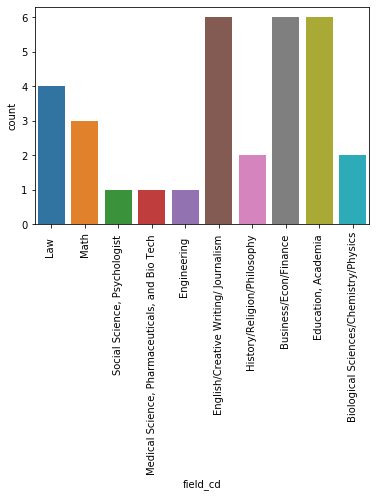

In [229]:
sns.barplot(x=fields["field_cd"], y=fields["count"]).set_xticklabels(
    rotation=90, labels=cols
)
;

In [238]:
def ret_cross_attr(atrr2):
    temp = pd.crosstab(index=ten[atrr2], columns="count").reset_index()
    return sns.barplot(x=temp[atrr2], y=temp["count"])

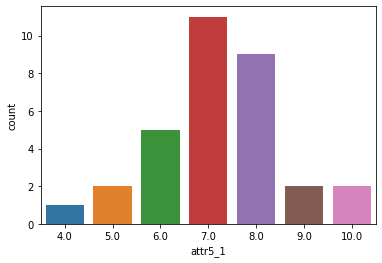

In [239]:
ret_cross_attr("attr5_1")

### How they felt about themselves -> Fun

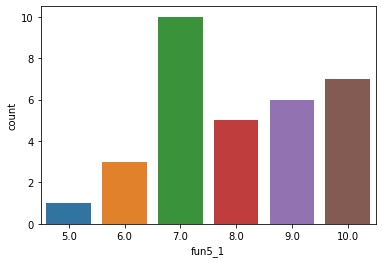

In [240]:
ret_cross_attr("fun5_1")

### How they felt about themselves -> Ambitious

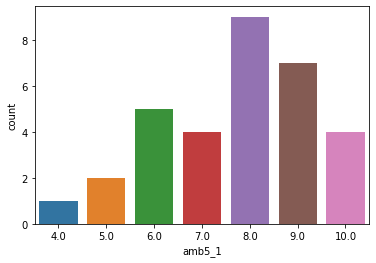

In [242]:
ret_cross_attr("amb5_1")

### How happy do you expect it will make you?

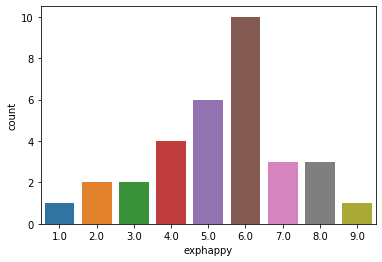

In [243]:
ret_cross_attr("exphappy")

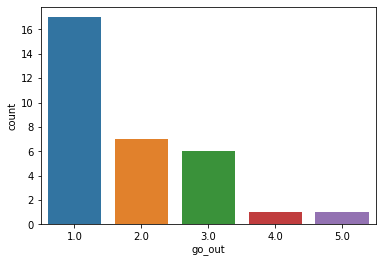

In [249]:
ret_cross_attr("go_out")

# Observations

- 20.740 got a second date